I, Sreyrath Poeun, hereby state that I have not communicated with or gained information in any way from my classmates or anyone other than Professor Aiken during this exam, and that all work is my own. I have properly cited any code that I have used from other sources.

In [1]:
#set up
import numpy as np
import pandas as pd
import datetime as datetime

Part 1

In [2]:
property_sample=pd.read_csv('https://raw.githubusercontent.com/aaiken1/fin-data-analysis-python/main/data/properties_2016_sample10_1.csv')

C:\Users\spoeun\AppData\Local\Temp/ipykernel_17704/513907440.py:1: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  property_sample=pd.read_csv('https://raw.githubusercontent.com/aaiken1/fin-data-analysis-python/main/data/properties_2016_sample10_1.csv')


In [3]:
property_sample

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11429808,NaN,NaN,NaN,4.0,5.0,NaN,7.0,4.0,NaN,...,NaN,NaN,138384.0,352996.0,2015.0,214612.0,4451.49,NaN,NaN,6.037603e+13
1,14670155,NaN,NaN,NaN,2.0,2.0,NaN,NaN,2.0,NaN,...,NaN,NaN,118767.0,178034.0,2015.0,59267.0,2366.38,NaN,NaN,6.059022e+13
2,12492279,NaN,NaN,NaN,2.0,3.0,NaN,7.0,2.0,NaN,...,NaN,NaN,113410.0,272923.0,2015.0,159513.0,3554.89,NaN,NaN,6.037571e+13
3,11850200,NaN,NaN,NaN,2.0,2.0,NaN,7.0,2.0,NaN,...,NaN,NaN,93956.0,357588.0,2015.0,263632.0,5732.77,NaN,NaN,6.037483e+13
4,11446621,NaN,NaN,NaN,2.0,4.0,NaN,7.0,2.0,NaN,...,NaN,NaN,68200.0,341015.0,2015.0,272815.0,4137.91,NaN,NaN,6.037650e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298517,14257871,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,...,3.0,NaN,65694.0,236684.0,2015.0,170990.0,3026.90,NaN,NaN,6.059074e+13
298518,14278671,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,...,1.0,NaN,128068.0,281675.0,2015.0,153607.0,3275.18,NaN,NaN,6.059063e+13
298519,14523297,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,14346.0,14346.0,2015.0,NaN,155.54,NaN,NaN,6.059100e+13
298520,14426769,NaN,NaN,NaN,4.5,3.0,NaN,NaN,4.5,NaN,...,NaN,NaN,412991.0,1075841.0,2015.0,662850.0,18214.74,NaN,NaN,6.059042e+13


In [4]:
property_sample.info()

#'parcelid'=integer; everything else is a float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298522 entries, 0 to 298521
Data columns (total 58 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   parcelid                      298522 non-null  int64  
 1   airconditioningtypeid         81220 non-null   float64
 2   architecturalstyletypeid      0 non-null       float64
 3   basementsqft                  152 non-null     float64
 4   bathroomcnt                   297341 non-null  float64
 5   bedroomcnt                    297341 non-null  float64
 6   buildingclasstypeid           1302 non-null    float64
 7   buildingqualitytypeid         193961 non-null  float64
 8   calculatedbathnbr             285491 non-null  float64
 9   decktypeid                    1670 non-null    float64
 10  finishedfloor1squarefeet      20096 non-null   float64
 11  calculatedfinishedsquarefeet  292951 non-null  float64
 12  finishedsquarefeet12          270833 non-nul

In [5]:
property_train=pd.read_csv('https://raw.githubusercontent.com/aaiken1/fin-data-analysis-python/main/data/train_2016_v2.csv',parse_dates=['transactiondate'])

In [6]:
property_train.info()
#'parcelid': integer, 'logerror'=float, 'transactiondate'=date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90275 entries, 0 to 90274
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   parcelid         90275 non-null  int64         
 1   logerror         90275 non-null  float64       
 2   transactiondate  90275 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.1 MB


In [7]:
property_train

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02
...,...,...,...
90270,10774160,-0.0356,2016-12-30
90271,12046695,0.0070,2016-12-30
90272,12995401,-0.2679,2016-12-30
90273,11402105,0.0602,2016-12-30


In [8]:
#Merge them together and keep only the observations in both data sets
zillow_data = pd.merge(property_sample, property_train, how='inner', on='parcelid')
zillow_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9071 entries, 0 to 9070
Data columns (total 60 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   parcelid                      9071 non-null   int64         
 1   airconditioningtypeid         2871 non-null   float64       
 2   architecturalstyletypeid      0 non-null      float64       
 3   basementsqft                  5 non-null      float64       
 4   bathroomcnt                   9071 non-null   float64       
 5   bedroomcnt                    9071 non-null   float64       
 6   buildingclasstypeid           3 non-null      float64       
 7   buildingqualitytypeid         5694 non-null   float64       
 8   calculatedbathnbr             8948 non-null   float64       
 9   decktypeid                    64 non-null     float64       
 10  finishedfloor1squarefeet      695 non-null    float64       
 11  calculatedfinishedsquarefeet  

In [9]:
zillow_data.columns

Index(['parcelid', 'airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardbuildin

Part 2

In [10]:
#min and max transaction date in the data
zillow_data.transactiondate.agg([min,max])

min   2016-01-01
max   2016-12-30
Name: transactiondate, dtype: datetime64[ns]

Part 3

In [11]:
#twenty most common vales for yearbuilt in the data
zillow_data.groupby('yearbuilt')['parcelid'].agg('count').sort_values(ascending=False).head(20)

yearbuilt
1955.0    234
1989.0    217
1950.0    208
1954.0    206
1973.0    181
1990.0    179
1987.0    173
1964.0    169
1956.0    168
1963.0    160
1980.0    159
1953.0    156
1974.0    156
1972.0    154
1948.0    153
1965.0    152
1985.0    152
1979.0    149
1962.0    149
1951.0    142
Name: parcelid, dtype: int64

In [12]:
zillow_data.groupby(['regionidcity','regionidcounty'])['parcelid'].agg('count').sort_values(ascending=False).head(20)

regionidcity  regionidcounty
12447.0       3101.0            2019
46298.0       3101.0             267
52650.0       1286.0             220
54311.0       3101.0             218
5534.0        3101.0             199
40227.0       3101.0             192
16764.0       1286.0             178
25218.0       1286.0             173
34278.0       2061.0             156
12773.0       1286.0             128
47568.0       1286.0             120
54722.0       3101.0             116
45457.0       3101.0             113
24832.0       1286.0             112
13150.0       2061.0             110
24812.0       1286.0             110
27110.0       2061.0             109
47019.0       3101.0             109
33252.0       1286.0             108
53571.0       1286.0             102
Name: parcelid, dtype: int64

In [13]:
#For both parts, I use sort_values(ascending=False) to order the count in descending order

Part 4

In [14]:
#Create a summary of the mean and standard deviation lot size (in square feet) and the tax value (in current dollars) by regionidcity
zillow_data.groupby('regionidcity')['lotsizesquarefeet','taxvaluedollarcnt'].agg([np.mean, np.std]) 

C:\Users\spoeun\AppData\Local\Temp/ipykernel_17704/1813110939.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  zillow_data.groupby('regionidcity')['lotsizesquarefeet','taxvaluedollarcnt'].agg([np.mean, np.std])


lotsizesquarefeet               taxvaluedollarcnt               
                          mean           std              mean            std
regionidcity                                                                 
3491.0             3274.000000           NaN     167870.000000            NaN
4406.0            21354.931818  64831.904289     374480.636364  354129.666610
5465.0            12382.680000  26743.932212     306986.800000  152973.268201
5534.0            18029.736041  40321.582262     175081.045226   92749.417975
6021.0             9531.962963   6104.755816     239490.107143  184029.951718
...                        ...           ...               ...            ...
396053.0           5382.222222   1262.810570     176237.055556   79733.150078
396054.0          24202.775862  75097.304331     363721.096774  375900.126604
396550.0           6313.333333    399.481539     264204.666667  191894.756786
396551.0           9476.166667   5789.846236     357663.555556  233136.327278
396556.0           6219.944444   1006.795935     188996.111111  124439.509784

[168 rows x 4 columns]

In [15]:
#Same as above but filter to only include houses with a pool
zillow_data[zillow_data.poolcnt==1].groupby('regionidcity')['lotsizesquarefeet','taxvaluedollarcnt'].agg([np.mean, np.std]) 

C:\Users\spoeun\AppData\Local\Temp/ipykernel_17704/1901964342.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  zillow_data[zillow_data.poolcnt==1].groupby('regionidcity')['lotsizesquarefeet','taxvaluedollarcnt'].agg([np.mean, np.std])


lotsizesquarefeet                taxvaluedollarcnt               
                          mean            std              mean            std
regionidcity                                                                  
4406.0            49948.545455  127293.202571     562941.454545  624118.335545
5465.0             8382.111111    4822.564345     327507.222222  119565.445474
5534.0            16896.000000   25750.522119     223781.291667   91420.374612
6021.0             7888.000000            NaN      81555.000000            NaN
6395.0           194355.833333  122234.842940     178957.833333   46436.665278
...                        ...            ...               ...            ...
118878.0         247525.000000            NaN     213000.000000            NaN
118895.0           6184.000000     531.744299     253937.500000  106154.405526
118994.0           6890.000000            NaN     180981.000000            NaN
396054.0          48211.727273  100706.462322     753131.166667  657817.252805
396551.0           8021.200000    1235.327163     306665.400000  190326.478708

[129 rows x 4 columns]

In [16]:
#Create a summary of the mean and standard deviation lot size (in square feet) and the tax value (in current dollars) by regionidcity
zillow_data.groupby('regionidcity')['lotsizesquarefeet','taxvaluedollarcnt'].agg([np.mean, np.std]).round(2)

C:\Users\spoeun\AppData\Local\Temp/ipykernel_17704/2510797245.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  zillow_data.groupby('regionidcity')['lotsizesquarefeet','taxvaluedollarcnt'].agg([np.mean, np.std]).round(2)


lotsizesquarefeet           taxvaluedollarcnt           
                          mean       std              mean        std
regionidcity                                                         
3491.0                 3274.00       NaN         167870.00        NaN
4406.0                21354.93  64831.90         374480.64  354129.67
5465.0                12382.68  26743.93         306986.80  152973.27
5534.0                18029.74  40321.58         175081.05   92749.42
6021.0                 9531.96   6104.76         239490.11  184029.95
...                        ...       ...               ...        ...
396053.0               5382.22   1262.81         176237.06   79733.15
396054.0              24202.78  75097.30         363721.10  375900.13
396550.0               6313.33    399.48         264204.67  191894.76
396551.0               9476.17   5789.85         357663.56  233136.33
396556.0               6219.94   1006.80         188996.11  124439.51

[168 rows x 4 columns]

In [17]:
#Same as above but filter to only include houses with a pool
zillow_data[zillow_data.poolcnt==1].groupby('regionidcity')['lotsizesquarefeet','taxvaluedollarcnt'].agg([np.mean, np.std]).round(2)

C:\Users\spoeun\AppData\Local\Temp/ipykernel_17704/3605697433.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  zillow_data[zillow_data.poolcnt==1].groupby('regionidcity')['lotsizesquarefeet','taxvaluedollarcnt'].agg([np.mean, np.std]).round(2)


lotsizesquarefeet            taxvaluedollarcnt           
                          mean        std              mean        std
regionidcity                                                          
4406.0                49948.55  127293.20         562941.45  624118.34
5465.0                 8382.11    4822.56         327507.22  119565.45
5534.0                16896.00   25750.52         223781.29   91420.37
6021.0                 7888.00        NaN          81555.00        NaN
6395.0               194355.83  122234.84         178957.83   46436.67
...                        ...        ...               ...        ...
118878.0             247525.00        NaN         213000.00        NaN
118895.0               6184.00     531.74         253937.50  106154.41
118994.0               6890.00        NaN         180981.00        NaN
396054.0              48211.73  100706.46         753131.17  657817.25
396551.0               8021.20    1235.33         306665.40  190326.48

[129 rows x 4 columns]

Part 5

In [18]:
#new DataFrame with just the parcel ID, the pricing error, the transaction date, and the regionidcity
new_zillow=zillow_data[['parcelid','logerror','transactiondate','regionidcity']]
new_zillow

,parcelid,logerror,transactiondate,regionidcity
0,13005045,0.0962,2016-05-18,14111.0
1,17279551,0.0020,2016-09-02,34278.0
2,12605376,-0.0566,2016-09-28,10723.0
3,11713859,0.0227,2016-02-04,12447.0
4,17193642,0.0237,2016-06-28,34278.0
...,...,...,...,...
9066,12653293,-0.0305,2016-03-18,12447.0
9067,11907619,0.0266,2016-03-22,50677.0
9068,14001605,0.0090,2016-06-21,24832.0
9069,12892836,0.0497,2016-07-27,20008.0


In [19]:
dup=new_zillow.parcelid.duplicated(keep=False)
dup

0       False
1       False
2       False
3       False
4       False
        ...  
9066    False
9067    False
9068    False
9069    False
9070    False
Name: parcelid, Length: 9071, dtype: bool

In [20]:
#create nonduplicate dataframe
non_unique_data=new_zillow.loc[dup].drop_duplicates('parcelid')
non_unique_data

,parcelid,logerror,transactiondate,regionidcity
431,14607531,-0.0965,2016-06-23,24832.0
1536,14444102,-0.1948,2016-04-29,13693.0
1952,11122560,-0.0202,2016-02-08,54311.0
2209,11866315,-0.0010,2016-01-12,54212.0
2755,14621246,-0.0141,2016-05-05,33840.0
2856,11105038,-0.0545,2016-04-12,54311.0
3946,14485861,-0.0284,2016-01-19,12773.0
4497,12545874,-0.0070,2016-03-04,46298.0
6255,12978851,-0.0747,2016-05-24,10241.0
7003,10798910,-0.0471,2016-04-12,12447.0


In [21]:
zillow_data.insert(loc=0, column='transactionID', value=np.arange(len(zillow_data)))


In [22]:
zillow_data

,transactionID,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate
0,0,13005045,NaN,NaN,NaN,3.0,2.0,NaN,7.0,3.0,...,119366.0,162212.0,2015.0,42846.0,2246.17,NaN,NaN,6.037432e+13,0.0962,2016-05-18
1,1,17279551,NaN,NaN,NaN,3.0,4.0,NaN,NaN,3.0,...,324642.0,541069.0,2015.0,216427.0,5972.72,NaN,NaN,6.111006e+13,0.0020,2016-09-02
2,2,12605376,NaN,NaN,NaN,2.0,3.0,NaN,7.0,2.0,...,167010.0,375907.0,2015.0,208897.0,5160.90,NaN,NaN,6.037544e+13,-0.0566,2016-09-28
3,3,11713859,NaN,NaN,NaN,2.0,2.0,NaN,4.0,2.0,...,232690.0,588746.0,2015.0,356056.0,7353.80,NaN,NaN,6.037236e+13,0.0227,2016-02-04
4,4,17193642,NaN,NaN,NaN,3.5,3.0,NaN,NaN,3.5,...,392869.0,777041.0,2015.0,384172.0,8668.90,NaN,NaN,6.111006e+13,0.0237,2016-06-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9066,9066,12653293,NaN,NaN,NaN,3.0,5.0,NaN,7.0,3.0,...,271604.0,559101.0,2015.0,287497.0,6857.67,NaN,NaN,6.037297e+13,-0.0305,2016-03-18
9067,9067,11907619,1.0,NaN,NaN,3.0,3.0,NaN,4.0,3.0,...,152919.0,304640.0,2015.0,151721.0,4676.24,NaN,NaN,6.037481e+13,0.0266,2016-03-22
9068,9068,14001605,NaN,NaN,NaN,2.0,4.0,NaN,NaN,2.0,...,51206.0,74870.0,2015.0,23664.0,1418.96,NaN,NaN,6.059110e+13,0.0090,2016-06-21
9069,9069,12892836,NaN,NaN,NaN,2.0,3.0,NaN,4.0,2.0,...,166585.0,238968.0,2015.0,72383.0,3122.67,NaN,NaN,6.037402e+13,0.0497,2016-07-27


Part 6

In [23]:
regionid_count=zillow_data.regionidcity.value_counts().to_frame()
regionid_count

,regionidcity
12447.0,2019
46298.0,267
52650.0,220
54311.0,218
5534.0,199
...,...
42091.0,1
13311.0,1
25271.0,1
3491.0,1


In [24]:
#Show me a table that gives only the regionidcity that have over 100 transactions (i.e. observations) in the data.
regionid_count[regionid_count.regionidcity>100]

#only get the number from the regionidcity

,regionidcity
12447.0,2019
46298.0,267
52650.0,220
54311.0,218
5534.0,199
40227.0,192
16764.0,178
25218.0,173
34278.0,156
12773.0,128


In [25]:
zillow_data['houses_sold']=zillow_data.groupby('regionidcity')['logerror'].transform('count') 
zillow_data

,transactionID,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate,houses_sold
0,0,13005045,NaN,NaN,NaN,3.0,2.0,NaN,7.0,3.0,...,162212.0,2015.0,42846.0,2246.17,NaN,NaN,6.037432e+13,0.0962,2016-05-18,25.0
1,1,17279551,NaN,NaN,NaN,3.0,4.0,NaN,NaN,3.0,...,541069.0,2015.0,216427.0,5972.72,NaN,NaN,6.111006e+13,0.0020,2016-09-02,156.0
2,2,12605376,NaN,NaN,NaN,2.0,3.0,NaN,7.0,2.0,...,375907.0,2015.0,208897.0,5160.90,NaN,NaN,6.037544e+13,-0.0566,2016-09-28,40.0
3,3,11713859,NaN,NaN,NaN,2.0,2.0,NaN,4.0,2.0,...,588746.0,2015.0,356056.0,7353.80,NaN,NaN,6.037236e+13,0.0227,2016-02-04,2019.0
4,4,17193642,NaN,NaN,NaN,3.5,3.0,NaN,NaN,3.5,...,777041.0,2015.0,384172.0,8668.90,NaN,NaN,6.111006e+13,0.0237,2016-06-28,156.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9066,9066,12653293,NaN,NaN,NaN,3.0,5.0,NaN,7.0,3.0,...,559101.0,2015.0,287497.0,6857.67,NaN,NaN,6.037297e+13,-0.0305,2016-03-18,2019.0
9067,9067,11907619,1.0,NaN,NaN,3.0,3.0,NaN,4.0,3.0,...,304640.0,2015.0,151721.0,4676.24,NaN,NaN,6.037481e+13,0.0266,2016-03-22,33.0
9068,9068,14001605,NaN,NaN,NaN,2.0,4.0,NaN,NaN,2.0,...,74870.0,2015.0,23664.0,1418.96,NaN,NaN,6.059110e+13,0.0090,2016-06-21,112.0
9069,9069,12892836,NaN,NaN,NaN,2.0,3.0,NaN,4.0,2.0,...,238968.0,2015.0,72383.0,3122.67,NaN,NaN,6.037402e+13,0.0497,2016-07-27,70.0


In [26]:
zillow = zillow_data[zillow_data.houses_sold>=5].copy()
zillow

,transactionID,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate,houses_sold
0,0,13005045,NaN,NaN,NaN,3.0,2.0,NaN,7.0,3.0,...,162212.0,2015.0,42846.0,2246.17,NaN,NaN,6.037432e+13,0.0962,2016-05-18,25.0
1,1,17279551,NaN,NaN,NaN,3.0,4.0,NaN,NaN,3.0,...,541069.0,2015.0,216427.0,5972.72,NaN,NaN,6.111006e+13,0.0020,2016-09-02,156.0
2,2,12605376,NaN,NaN,NaN,2.0,3.0,NaN,7.0,2.0,...,375907.0,2015.0,208897.0,5160.90,NaN,NaN,6.037544e+13,-0.0566,2016-09-28,40.0
3,3,11713859,NaN,NaN,NaN,2.0,2.0,NaN,4.0,2.0,...,588746.0,2015.0,356056.0,7353.80,NaN,NaN,6.037236e+13,0.0227,2016-02-04,2019.0
4,4,17193642,NaN,NaN,NaN,3.5,3.0,NaN,NaN,3.5,...,777041.0,2015.0,384172.0,8668.90,NaN,NaN,6.111006e+13,0.0237,2016-06-28,156.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9066,9066,12653293,NaN,NaN,NaN,3.0,5.0,NaN,7.0,3.0,...,559101.0,2015.0,287497.0,6857.67,NaN,NaN,6.037297e+13,-0.0305,2016-03-18,2019.0
9067,9067,11907619,1.0,NaN,NaN,3.0,3.0,NaN,4.0,3.0,...,304640.0,2015.0,151721.0,4676.24,NaN,NaN,6.037481e+13,0.0266,2016-03-22,33.0
9068,9068,14001605,NaN,NaN,NaN,2.0,4.0,NaN,NaN,2.0,...,74870.0,2015.0,23664.0,1418.96,NaN,NaN,6.059110e+13,0.0090,2016-06-21,112.0
9069,9069,12892836,NaN,NaN,NaN,2.0,3.0,NaN,4.0,2.0,...,238968.0,2015.0,72383.0,3122.67,NaN,NaN,6.037402e+13,0.0497,2016-07-27,70.0


In [27]:
#Then, using the new DataFrame, find the mean and median of the absolute value of the log error by regionidcity. 
# So, another summary table and groupby. 
# You can use .abs() to find the absolute value of a number.

zillow['logerror_abs']=zillow.logerror.abs()

#zillow.groupby('regionidcity')['logerror'].abs().agg([mean,median])

In [28]:
zillow

,transactionID,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate,houses_sold,logerror_abs
0,0,13005045,NaN,NaN,NaN,3.0,2.0,NaN,7.0,3.0,...,2015.0,42846.0,2246.17,NaN,NaN,6.037432e+13,0.0962,2016-05-18,25.0,0.0962
1,1,17279551,NaN,NaN,NaN,3.0,4.0,NaN,NaN,3.0,...,2015.0,216427.0,5972.72,NaN,NaN,6.111006e+13,0.0020,2016-09-02,156.0,0.0020
2,2,12605376,NaN,NaN,NaN,2.0,3.0,NaN,7.0,2.0,...,2015.0,208897.0,5160.90,NaN,NaN,6.037544e+13,-0.0566,2016-09-28,40.0,0.0566
3,3,11713859,NaN,NaN,NaN,2.0,2.0,NaN,4.0,2.0,...,2015.0,356056.0,7353.80,NaN,NaN,6.037236e+13,0.0227,2016-02-04,2019.0,0.0227
4,4,17193642,NaN,NaN,NaN,3.5,3.0,NaN,NaN,3.5,...,2015.0,384172.0,8668.90,NaN,NaN,6.111006e+13,0.0237,2016-06-28,156.0,0.0237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9066,9066,12653293,NaN,NaN,NaN,3.0,5.0,NaN,7.0,3.0,...,2015.0,287497.0,6857.67,NaN,NaN,6.037297e+13,-0.0305,2016-03-18,2019.0,0.0305
9067,9067,11907619,1.0,NaN,NaN,3.0,3.0,NaN,4.0,3.0,...,2015.0,151721.0,4676.24,NaN,NaN,6.037481e+13,0.0266,2016-03-22,33.0,0.0266
9068,9068,14001605,NaN,NaN,NaN,2.0,4.0,NaN,NaN,2.0,...,2015.0,23664.0,1418.96,NaN,NaN,6.059110e+13,0.0090,2016-06-21,112.0,0.0090
9069,9069,12892836,NaN,NaN,NaN,2.0,3.0,NaN,4.0,2.0,...,2015.0,72383.0,3122.67,NaN,NaN,6.037402e+13,0.0497,2016-07-27,70.0,0.0497


In [29]:
table=zillow.groupby('regionidcity')['logerror_abs'].agg([np.mean,np.median]).round(5)
table

,mean,median
regionidcity,,
4406.0,0.08740,0.02910
5465.0,0.03247,0.02355
5534.0,0.07656,0.03630
6021.0,0.06132,0.03875
6395.0,0.07445,0.03150
...,...,...
396053.0,0.10476,0.04345
396054.0,0.04662,0.03390
396550.0,0.06986,0.06190


In [30]:
#Show the regionidcity with the 10 largest mean pricing errors. Round to five decimal places.
table.sort_values(ascending=False, by='mean').head(10).round(5)

#pd.options.display.float_format = '{:,.2f}'.format
#Can also use round function

,mean,median
regionidcity,,
36502.0,0.28604,0.11420
52842.0,0.22696,0.07420
17597.0,0.19736,0.02595
56780.0,0.17608,0.06950
29189.0,0.16878,0.14240
27183.0,0.14881,0.05350
46098.0,0.14682,0.06250
47762.0,0.14464,0.05460
39076.0,0.13065,0.05130


Part 7

In [31]:
zillow_data['logerror_abs']=zillow.logerror.abs()

In [32]:
#create new dataframe parcelid, transactiondate, and logerror
diff_zillow1=zillow_data[['parcelid', 'transactiondate', 'logerror_abs']]
diff_zillow1

,parcelid,transactiondate,logerror_abs
0,13005045,2016-05-18,0.0962
1,17279551,2016-09-02,0.0020
2,12605376,2016-09-28,0.0566
3,11713859,2016-02-04,0.0227
4,17193642,2016-06-28,0.0237
...,...,...,...
9066,12653293,2016-03-18,0.0305
9067,11907619,2016-03-22,0.0266
9068,14001605,2016-06-21,0.0090
9069,12892836,2016-07-27,0.0497


In [33]:
#create another new DataFrame that has just parcelid, transactiondate, and bedroomcnt.
diff_zillow2=zillow_data[['parcelid', 'transactiondate', 'bedroomcnt']]
diff_zillow2

,parcelid,transactiondate,bedroomcnt
0,13005045,2016-05-18,2.0
1,17279551,2016-09-02,4.0
2,12605376,2016-09-28,3.0
3,11713859,2016-02-04,2.0
4,17193642,2016-06-28,3.0
...,...,...,...
9066,12653293,2016-03-18,5.0
9067,11907619,2016-03-22,3.0
9068,14001605,2016-06-21,4.0
9069,12892836,2016-07-27,3.0


In [34]:
#merge both together 
diff_zillow = pd.merge(diff_zillow1, diff_zillow2, how='inner')
diff_zillow


,parcelid,transactiondate,logerror_abs,bedroomcnt
0,13005045,2016-05-18,0.0962,2.0
1,17279551,2016-09-02,0.0020,4.0
2,12605376,2016-09-28,0.0566,3.0
3,11713859,2016-02-04,0.0227,2.0
4,17193642,2016-06-28,0.0237,3.0
...,...,...,...,...
9066,12653293,2016-03-18,0.0305,5.0
9067,11907619,2016-03-22,0.0266,3.0
9068,14001605,2016-06-21,0.0090,4.0
9069,12892836,2016-07-27,0.0497,3.0


In [35]:
#9071 rows total. This makes sense since the original data has 9071 rows and the I'm doing an inner join on both new dataframe.

In [36]:
#filter your data based on multiple conditions – only keep observations where bedroomcnt > 2 and logerror_abs < 0.5
diff_zillow[(diff_zillow.bedroomcnt>2) & (diff_zillow.logerror_abs<.5)]

,parcelid,transactiondate,logerror_abs,bedroomcnt
1,17279551,2016-09-02,0.0020,4.0
2,12605376,2016-09-28,0.0566,3.0
4,17193642,2016-06-28,0.0237,3.0
5,14115590,2016-02-25,0.0971,5.0
9,11993683,2016-09-02,0.0276,7.0
...,...,...,...,...
9066,12653293,2016-03-18,0.0305,5.0
9067,11907619,2016-03-22,0.0266,3.0
9068,14001605,2016-06-21,0.0090,4.0
9069,12892836,2016-07-27,0.0497,3.0


In [37]:
import matplotlib.pyplot as plt

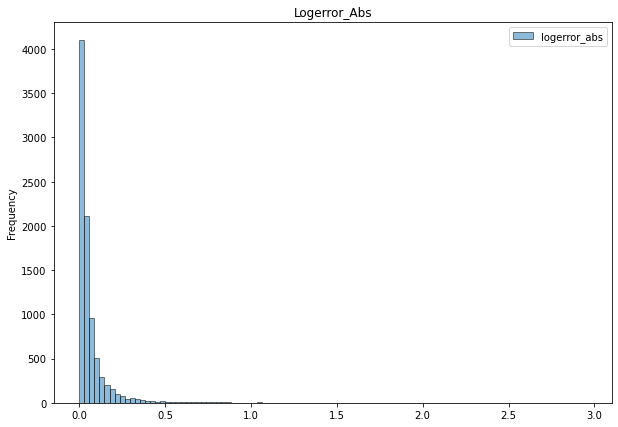

In [38]:
#hist ft pandas plot
diff_zillow.plot.hist(y = 'logerror_abs', bins = 100, alpha = 0.5, title = 'Logerror_Abs', edgecolor='black',figsize = (10,7))
plt.show()

Part 8

In [39]:
#regions.csv
region=pd.read_csv('https://raw.githubusercontent.com/aaiken1/fin-data-analysis-python/main/data/regions.csv')
region

,None,region_id,region_type,region
0,0,99999,zip,"98847; WA; Wenatchee, WA; Chelan County; Pesha..."
1,1,99998,zip,98846; WA; Okanogan County; Pateros
2,2,99997,zip,98845; WA; Wenatchee; Douglas County; Palisades
3,3,99996,zip,98844; WA; Okanogan County; Oroville
4,4,99995,zip,"98843; WA; Wenatchee, WA; Douglas County; Orondo"
...,...,...,...,...
89300,89300,100000,zip,"98848; WA; Moses Lake, WA; Grant County; Quincy"
89301,89301,10000,city,Bloomington; MD; Garrett County
89302,89302,1000,county,"Echols County; GA; Valdosta, GA"
89303,89303,100,county,"Bibb County; AL; Birmingham-Hoover, AL"


In [40]:
# zabt.csv, zatt.csv, and zsfh.csv from github "data"
zabt=pd.read_csv('https://raw.githubusercontent.com/aaiken1/fin-data-analysis-python/main/data/zabt.csv')
zabt

,None,indicator_id,region_id,date,value
0,0,ZABT,2694,2023-01-31,338807.898285
1,1,ZABT,2694,2022-12-31,337632.464417
2,2,ZABT,2694,2022-11-30,337446.865073
3,3,ZABT,2694,2022-10-31,329329.000000
4,4,ZABT,2694,2022-09-30,330059.000000
...,...,...,...,...,...
915,915,ZABT,1289,2000-12-31,116436.000000
916,916,ZABT,1289,2000-11-30,115677.000000
917,917,ZABT,1289,2000-10-31,114892.000000
918,918,ZABT,1289,2000-09-30,114653.000000


In [41]:
# zatt.csv, and zsfh.csv from github "data"
zatt=pd.read_csv('https://raw.githubusercontent.com/aaiken1/fin-data-analysis-python/main/data/zatt.csv')
zatt

,None,indicator_id,region_id,date,value
0,0,ZATT,2694,2023-01-31,1.115415e+06
1,1,ZATT,2694,2022-12-31,1.117934e+06
2,2,ZATT,2694,2022-11-30,1.120673e+06
3,3,ZATT,2694,2022-10-31,1.253470e+06
4,4,ZATT,2694,2022-09-30,1.250823e+06
...,...,...,...,...,...
915,915,ZATT,1289,2000-12-31,3.371080e+05
916,916,ZATT,1289,2000-11-30,3.339270e+05
917,917,ZATT,1289,2000-10-31,3.309000e+05
918,918,ZATT,1289,2000-09-30,3.299010e+05


In [42]:
# zsfh.csv from github "data"
zsfh=pd.read_csv('https://raw.githubusercontent.com/aaiken1/fin-data-analysis-python/main/data/zsfh.csv')
zsfh

,None,indicator_id,region_id,date,value
0,0,ZSFH,2694,2023-01-31,605655.781796
1,1,ZSFH,2694,2022-12-31,606152.087047
2,2,ZSFH,2694,2022-11-30,607121.637262
3,3,ZSFH,2694,2022-10-31,666604.000000
4,4,ZSFH,2694,2022-09-30,667014.000000
...,...,...,...,...,...
915,915,ZSFH,1289,2000-12-31,202581.000000
916,916,ZSFH,1289,2000-11-30,200971.000000
917,917,ZSFH,1289,2000-10-31,199471.000000
918,918,ZSFH,1289,2000-09-30,198964.000000


In [43]:
#drop None col for region
region=region.drop('None', axis=1)
region
#axis=0 is a row, axis=1 col 

,region_id,region_type,region
0,99999,zip,"98847; WA; Wenatchee, WA; Chelan County; Pesha..."
1,99998,zip,98846; WA; Okanogan County; Pateros
2,99997,zip,98845; WA; Wenatchee; Douglas County; Palisades
3,99996,zip,98844; WA; Okanogan County; Oroville
4,99995,zip,"98843; WA; Wenatchee, WA; Douglas County; Orondo"
...,...,...,...
89300,100000,zip,"98848; WA; Moses Lake, WA; Grant County; Quincy"
89301,10000,city,Bloomington; MD; Garrett County
89302,1000,county,"Echols County; GA; Valdosta, GA"
89303,100,county,"Bibb County; AL; Birmingham-Hoover, AL"


In [44]:
#drop None col for zabt
zabt=zabt.drop('None', axis=1)
zabt

,indicator_id,region_id,date,value
0,ZABT,2694,2023-01-31,338807.898285
1,ZABT,2694,2022-12-31,337632.464417
2,ZABT,2694,2022-11-30,337446.865073
3,ZABT,2694,2022-10-31,329329.000000
4,ZABT,2694,2022-09-30,330059.000000
...,...,...,...,...
915,ZABT,1289,2000-12-31,116436.000000
916,ZABT,1289,2000-11-30,115677.000000
917,ZABT,1289,2000-10-31,114892.000000
918,ZABT,1289,2000-09-30,114653.000000


In [45]:
#drop col for zatt
zatt=zatt.drop('None', axis=1)
zatt

,indicator_id,region_id,date,value
0,ZATT,2694,2023-01-31,1.115415e+06
1,ZATT,2694,2022-12-31,1.117934e+06
2,ZATT,2694,2022-11-30,1.120673e+06
3,ZATT,2694,2022-10-31,1.253470e+06
4,ZATT,2694,2022-09-30,1.250823e+06
...,...,...,...,...
915,ZATT,1289,2000-12-31,3.371080e+05
916,ZATT,1289,2000-11-30,3.339270e+05
917,ZATT,1289,2000-10-31,3.309000e+05
918,ZATT,1289,2000-09-30,3.299010e+05


In [46]:
#drop col for zsfh
zsfh=zsfh.drop('None', axis=1)
zsfh

,indicator_id,region_id,date,value
0,ZSFH,2694,2023-01-31,605655.781796
1,ZSFH,2694,2022-12-31,606152.087047
2,ZSFH,2694,2022-11-30,607121.637262
3,ZSFH,2694,2022-10-31,666604.000000
4,ZSFH,2694,2022-09-30,667014.000000
...,...,...,...,...
915,ZSFH,1289,2000-12-31,202581.000000
916,ZSFH,1289,2000-11-30,200971.000000
917,ZSFH,1289,2000-10-31,199471.000000
918,ZSFH,1289,2000-09-30,198964.000000


In [47]:
region

,region_id,region_type,region
0,99999,zip,"98847; WA; Wenatchee, WA; Chelan County; Pesha..."
1,99998,zip,98846; WA; Okanogan County; Pateros
2,99997,zip,98845; WA; Wenatchee; Douglas County; Palisades
3,99996,zip,98844; WA; Okanogan County; Oroville
4,99995,zip,"98843; WA; Wenatchee, WA; Douglas County; Orondo"
...,...,...,...
89300,100000,zip,"98848; WA; Moses Lake, WA; Grant County; Quincy"
89301,10000,city,Bloomington; MD; Garrett County
89302,1000,county,"Echols County; GA; Valdosta, GA"
89303,100,county,"Bibb County; AL; Birmingham-Hoover, AL"


In [48]:
#filter region_id
#|. For example, (x == 5) | (x == 4) | (x == 3)

region[(region.region_id==5)|(region.region_id==4)|(region.region_id==3)]

,region_id,region_type,region
57577,4,state,Alabama
66477,3,state,Alaska


Part 9

In [59]:
#concat the 3 dataframe except for the region
indices=pd.concat((zabt,zatt,zsfh),ignore_index = True,sort=False)
indices

#pd.concat((aapl, xom), sort=False) 

,indicator_id,region_id,date,value
0,ZABT,2694,2023-01-31,338807.898285
1,ZABT,2694,2022-12-31,337632.464417
2,ZABT,2694,2022-11-30,337446.865073
3,ZABT,2694,2022-10-31,329329.000000
4,ZABT,2694,2022-09-30,330059.000000
...,...,...,...,...
2755,ZSFH,1289,2000-12-31,202581.000000
2756,ZSFH,1289,2000-11-30,200971.000000
2757,ZSFH,1289,2000-10-31,199471.000000
2758,ZSFH,1289,2000-09-30,198964.000000


Part 10

In [60]:
indices['pct'] = indices.sort_values('value', ascending=True).groupby(['indicator_id', 'region_id']).value.pct_change()
indices

,indicator_id,region_id,date,value,pct
0,ZABT,2694,2023-01-31,338807.898285,0.003481
1,ZABT,2694,2022-12-31,337632.464417,0.000550
2,ZABT,2694,2022-11-30,337446.865073,0.022383
3,ZABT,2694,2022-10-31,329329.000000,0.001648
4,ZABT,2694,2022-09-30,330059.000000,0.000239
...,...,...,...,...,...
2755,ZSFH,1289,2000-12-31,202581.000000,0.008011
2756,ZSFH,1289,2000-11-30,200971.000000,0.007520
2757,ZSFH,1289,2000-10-31,199471.000000,0.002548
2758,ZSFH,1289,2000-09-30,198964.000000,0.003348


In [51]:
#Yes, expecting a missing calculation since the first value of each indicator and region id combination doesn't have any value to compare to

Going Wide

In [61]:
#First, select just the data for the ZSFH indicator

indices=indices[indices.indicator_id=='ZSFH']
indices

,indicator_id,region_id,date,value,pct
1840,ZSFH,2694,2023-01-31,605655.781796,0.000403
1841,ZSFH,2694,2022-12-31,606152.087047,0.000819
1842,ZSFH,2694,2022-11-30,607121.637262,0.000622
1843,ZSFH,2694,2022-10-31,666604.000000,0.006981
1844,ZSFH,2694,2022-09-30,667014.000000,0.000615
...,...,...,...,...,...
2755,ZSFH,1289,2000-12-31,202581.000000,0.008011
2756,ZSFH,1289,2000-11-30,200971.000000,0.007520
2757,ZSFH,1289,2000-10-31,199471.000000,0.002548
2758,ZSFH,1289,2000-09-30,198964.000000,0.003348


In [62]:
#Then, drop the indicator_id column

indices=indices.drop('indicator_id', axis=1)
indices 

,region_id,date,value,pct
1840,2694,2023-01-31,605655.781796,0.000403
1841,2694,2022-12-31,606152.087047,0.000819
1842,2694,2022-11-30,607121.637262,0.000622
1843,2694,2022-10-31,666604.000000,0.006981
1844,2694,2022-09-30,667014.000000,0.000615
...,...,...,...,...
2755,1289,2000-12-31,202581.000000,0.008011
2756,1289,2000-11-30,200971.000000,0.007520
2757,1289,2000-10-31,199471.000000,0.002548
2758,1289,2000-09-30,198964.000000,0.003348


In [63]:
indices = pd.pivot(indices, values='pct', columns='region_id')
indices

region_id,1289,2402,2694
1840,NaN,NaN,0.000403
1841,NaN,NaN,0.000819
1842,NaN,NaN,0.000622
1843,NaN,NaN,0.006981
1844,NaN,NaN,0.000615
...,...,...,...
2755,0.008011,NaN,NaN
2756,0.007520,NaN,NaN
2757,0.002548,NaN,NaN
2758,0.003348,NaN,NaN


In [64]:
indices = indices.rename(columns = {1289:'Orange_NC', 2402:'Maricopa_AZ', 2694:'Fairfield_CT'})
indices

region_id,Orange_NC,Maricopa_AZ,Fairfield_CT
1840,NaN,NaN,0.000403
1841,NaN,NaN,0.000819
1842,NaN,NaN,0.000622
1843,NaN,NaN,0.006981
1844,NaN,NaN,0.000615
...,...,...,...
2755,0.008011,NaN,NaN
2756,0.007520,NaN,NaN
2757,0.002548,NaN,NaN
2758,0.003348,NaN,NaN


Matplotlib

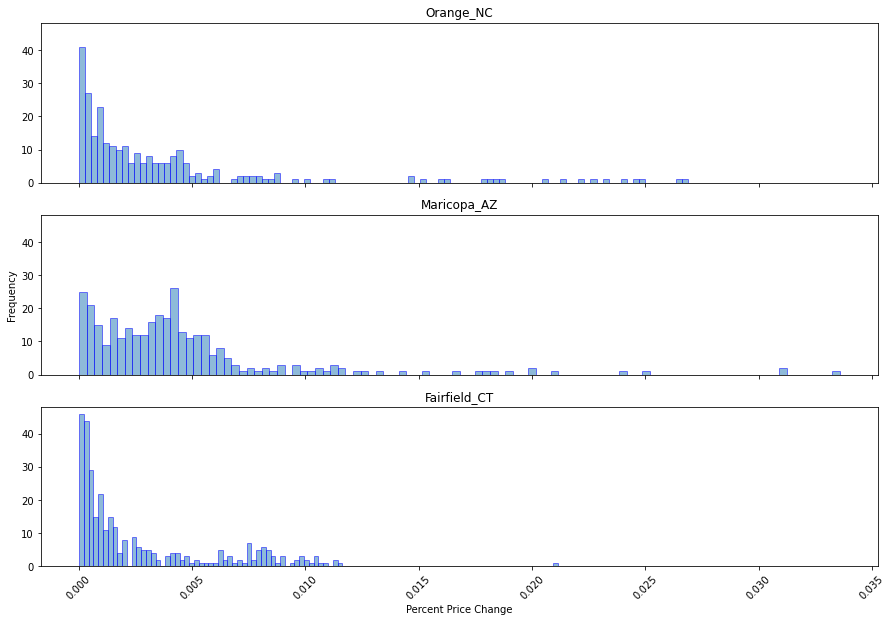

In [66]:
fig, axs = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(15, 10))

axs[0].hist(indices.Orange_NC,  bins=100,alpha=.5,edgecolor='b',)
axs[0].set_title('Orange_NC',fontsize=12)

axs[1].hist(indices.Maricopa_AZ,  bins=100,alpha=.5,edgecolor='b')
axs[1].set_title('Maricopa_AZ',fontsize=12)

axs[2].hist(indices.Fairfield_CT,  bins=100,alpha=.5,edgecolor='b')
axs[2].set_title('Fairfield_CT',fontsize=12)

axs[2].set_xlabel('Percent Price Change')
axs[1].set_ylabel('Frequency')

axs[2].ticklabel_format(axis='x', style='plain')

axs[2].tick_params(axis='x', rotation=45);